<a href="https://colab.research.google.com/github/quetion/time-series-analysis_11102/blob/main/TS_week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # plot 
import statsmodels.api as sm # regression 

In [2]:
!pip install yfinance
import yfinance as yf # download data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
data = yf.download('GBPUSD=X',interval='1mo') # download 'GBPUSD=X' monthly data

[*********************100%***********************]  1 of 1 completed


In [4]:
data = data['2004':'2023-04'] # set sample period: 2004/01 - 2023/04
data = data[['Adj Close']] # select data variable: 'Adj Close'

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2004-01-01 to 2023-04-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  232 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


In [8]:
data.columns = ['price_gbp'] # rename data columns
data['ret_gbp'] = np.log(data.price_gbp).diff() # add return variable
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 232 entries, 2004-01-01 to 2023-04-01
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   price_gbp  232 non-null    float64
 1   ret_gbp    231 non-null    float64
dtypes: float64(2)
memory usage: 5.4 KB


<Axes: xlabel='Date'>

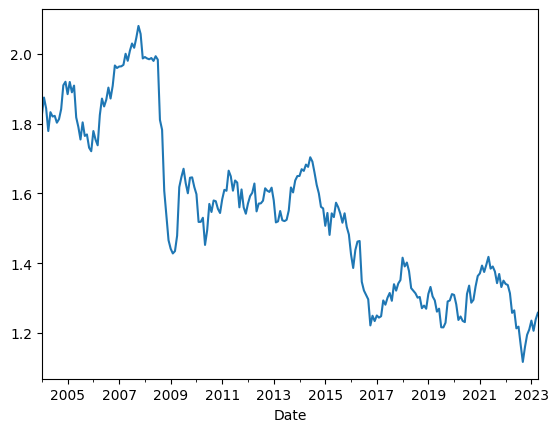

In [9]:
data.price_gbp.plot()

<Axes: xlabel='Date'>

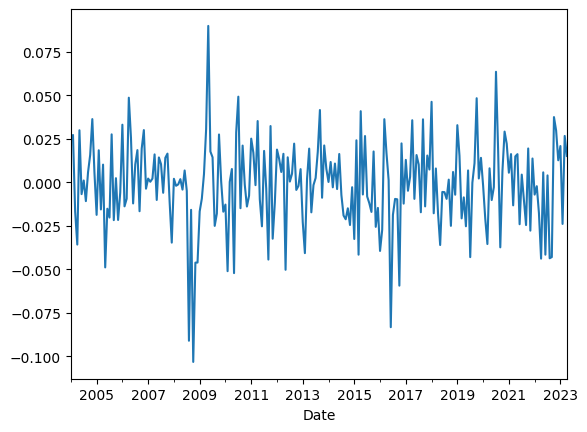

In [10]:
data.ret_gbp.plot()

In [15]:
m = data.ret_gbp.mean() # 平均數
annual_ret = m*12
print("年化報酬率: {:.4f}".format(annual_ret))
sd = data.ret_gbp.std() # 標準差
annual_sd = sd * (12)**(1/2)
print("年化標準差: {:.4f}".format(annual_sd))

年化報酬率: -0.0193
年化標準差: 0.0878


In [21]:
(data.ret_gbp < 0).mean() # 負報酬的頻率
test = data[data.ret_gbp < 0]
test.ret_gbp.sum()

-2.402123427589911

In [24]:
# estimate random walk model
data['const'] = 1 # construct the constant term
y = data.ret_gbp
x = data.const
res_rw = sm.OLS(y,x,missing='drop').fit()
print(res_rw.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 04 May 2023   Prob (F-statistic):                nan
Time:                        02:55:04   Log-Likelihood:                 521.77
No. Observations:                 231   AIC:                            -1042.
Df Residuals:                     230   BIC:                            -1038.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -0.966      0.3

In [22]:
data['ret_gbp_1'] = data.ret_gbp.shift() # add lag-one term
data['ret_gbp_2'] = data.ret_gbp.shift(2) # add lag-two term
# estimate AR(1)
y = data.ret_gbp
x = sm.add_constant(data['ret_gbp_1'])
res_ar1 = sm.OLS(y,x,missing='drop').fit()
print(res_ar1.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.6444
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.423
Time:                        02:40:59   Log-Likelihood:                 519.98
No. Observations:                 230   AIC:                            -1036.
Df Residuals:                     228   BIC:                            -1029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -0.983      0.3

In [25]:
# estimate AR(2)
y = data.ret_gbp
x = sm.add_constant(data[['ret_gbp_1','ret_gbp_2']])
res_ar2 = sm.OLS(y,x,missing='drop').fit()
print(res_ar2.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.050
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.131
Time:                        02:55:17   Log-Likelihood:                 519.13
No. Observations:                 229   AIC:                            -1032.
Df Residuals:                     226   BIC:                            -1022.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0014      0.002     -0.811      0.4

In [ ]:
# 估計結果各項物件 
# For example, random walk model (benchmark)
#res_rw.resid # 誤差
#res_rw.params.const # 估計參數數值
#res_rw.pvalues # p-values
#res_rw.fittedvalues # fitted value of y
#res_rw.tvalues # t-value

const   -0.988617
dtype: float64

In [ ]:
data.ret_gbp[5] - res_rw.params.const

-0.00514736442036889

In [ ]:
# 估計結果各項物件 
# AR(1) model (benchmark)
#res_ar1.resid # 誤差
#res_ar1.params[1] # 估計參數數值
#res_ar1.pvalues[1] # p-values
res_ar1.fittedvalues # fitted value of y
res_ar1.tvalues[0] # t-value

-1.0068977686888365

In [ ]:
data.ret_gbp[2] - (res_ar1.params[0] + res_ar1.params[1]*data.ret_gbp[1])

-0.016433965569872876

In [ ]:
# 估計結果各項物件 
# AR(2) model (benchmark)
res_ar2.resid # 誤差
#res_ar1.params[1] # 估計參數數值
#res_ar1.pvalues[1] # p-values
#res_ar1.fittedvalues # fitted value of y
#res_ar1.tvalues[0] # t-value

Date
2004-04-01   -0.036883
2004-05-01    0.035097
2004-06-01   -0.002463
2004-07-01   -0.000902
2004-08-01   -0.008640
                ...   
2022-12-01    0.008012
2023-01-01    0.017955
2023-02-01   -0.025088
2023-03-01    0.026651
2023-04-01    0.009824
Length: 229, dtype: float64

In [ ]:
res_ar2.resid

Date
2004-04-01   -0.036883
2004-05-01    0.035097
2004-06-01   -0.002463
2004-07-01   -0.000902
2004-08-01   -0.008640
                ...   
2022-12-01    0.008012
2023-01-01    0.017955
2023-02-01   -0.025088
2023-03-01    0.026651
2023-04-01    0.009824
Length: 229, dtype: float64

In [ ]:
# resid for 2004-04-01
ans = res_ar2.resid[0]
print('2004-04的誤差為{:.4f}'.format(ans))
real_y = data.ret_gbp[3]
est_y = res_ar2.params[0]+res_ar2.params[1]*data.ret_gbp[2]+res_ar2.params[2]*data.ret_gbp[1]
myans = real_y - est_y
print('實際估算結果為{:.4f}'.format(myans))


2004-04的誤差為-0.0369
實際估算結果為-0.0369


In [ ]:
# resid for 2010-01-01
loc = 9+5*12+1-1
ans = res_ar2.resid[loc]
print('2010-01的誤差為{:.4f}'.format(ans))
real_y = data.ret_gbp[loc+3]
est_y = res_ar2.params[0]+res_ar2.params[1]*data.ret_gbp[loc+2]+res_ar2.params[2]*data.ret_gbp[loc+1]
myans = real_y - est_y
print('2010-01實際估算結果為{:.4f}'.format(myans))


2010-01的誤差為-0.0107
2010-01實際估算結果為-0.0107


In [ ]:
# MSE的計算
np.mean(res_ar2.resid**2)

0.0006277325940326306

In [26]:
res_rw.resid**2

Date
2004-02-01    0.000821
2004-03-01    0.000229
2004-04-01    0.001167
2004-05-01    0.000994
2004-06-01    0.000027
                ...   
2022-12-01    0.000203
2023-01-01    0.000503
2023-02-01    0.000498
2023-03-01    0.000798
2023-04-01    0.000280
Length: 231, dtype: float64

In [27]:
# compare two models
# rw & ar(1)
d1 = res_rw.resid**2 - res_ar1.resid**2 
const = np.ones(len(d1))
y = d1
x = const
res_comp = sm.OLS(y,x,missing='drop').fit(cov_type='HAC',cov_kwds={'maxlags':10})
# Newey-West standard error --> .fit(cov_type='HAC',cov_kwds={'maxlags':10})
print(res_comp.summary())
# 因為係數不顯著, 兩模型沒有顯著差異
# 匯率資料一般會假定是服從隨機漫步模型(random walk model)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 04 May 2023   Prob (F-statistic):                nan
Time:                        02:59:49   Log-Likelihood:                 1888.5
No. Observations:                 230   AIC:                            -3775.
Df Residuals:                     229   BIC:                            -3772.
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.815e-06   6.33e-06      0.287      0.7

In [28]:
# compare two models
# rw & ar(2)
d1 = res_rw.resid**2 - res_ar2.resid**2 
const = np.ones(len(d1))
y = d1
x = const
res_comp = sm.OLS(y,x,missing='drop').fit(cov_type='HAC',cov_kwds={'maxlags':10})
print(res_comp.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 04 May 2023   Prob (F-statistic):                nan
Time:                        03:17:11   Log-Likelihood:                 1608.5
No. Observations:                 229   AIC:                            -3215.
Df Residuals:                     228   BIC:                            -3211.
Df Model:                           0                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e-05   1.97e-05      0.578      0.5

In [29]:
len(data)

232

In [30]:
data.ret_gbp[:5]

Date
2004-01-01         NaN
2004-02-01    0.027036
2004-03-01   -0.016730
2004-04-01   -0.035778
2004-05-01    0.029914
Name: ret_gbp, dtype: float64

In [31]:
# estimate random walk model
data['const'] = 1 # construct the constant term
y = data.ret_gbp[:200]
x = data.const[:200]
res_rw_insample = sm.OLS(y,x,missing='drop').fit()
print(res_rw_insample.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 04 May 2023   Prob (F-statistic):                nan
Time:                        03:26:08   Log-Likelihood:                 447.96
No. Observations:                 199   AIC:                            -893.9
Df Residuals:                     198   BIC:                            -890.6
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -0.866      0.3

In [32]:
data.ret_gbp[:200]

Date
2004-01-01         NaN
2004-02-01    0.027036
2004-03-01   -0.016730
2004-04-01   -0.035778
2004-05-01    0.029914
                ...   
2020-04-01    0.008037
2020-05-01   -0.010193
2020-06-01   -0.002792
2020-07-01    0.063516
2020-08-01    0.018028
Name: ret_gbp, Length: 200, dtype: float64

In [36]:
data.ret_gbp[0+200]

-0.03737220379599965

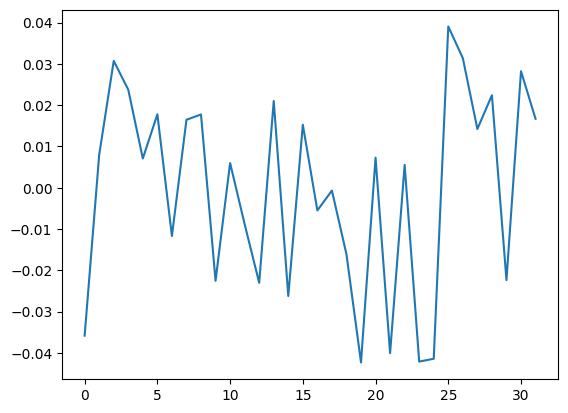

In [39]:
# out-of-sample: random walk
# fix parameters method 
R = 200
T = len(data)
rr = np.zeros(T-R)
for i in range(T-R):
  fit = res_rw_insample.params[0]
  rr[i] = data.ret_gbp[i+R]- fit
plt.plot(rr)


In [42]:
# estimate AR(1)
y = data.ret_gbp[:200]
x = sm.add_constant(data['ret_gbp_1'])[:200]
res_ar1_insample = sm.OLS(y,x,missing='drop').fit()
print(res_ar1_insample.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_gbp   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8489
Date:                Thu, 04 May 2023   Prob (F-statistic):              0.358
Time:                        03:47:50   Log-Likelihood:                 446.27
No. Observations:                 198   AIC:                            -888.5
Df Residuals:                     196   BIC:                            -882.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0016      0.002     -0.881      0.3

In [45]:
# out-of-sample: ar(1)
# fix parameters method 
R = 200
T = len(data)
rr = np.zeros(T-R)
# Step1: 樣本內估計AR(1)模型
y = data.ret_gbp[:200]
x = sm.add_constant(data[['ret_gbp_1','ret_gbp_2']])[:200]
res_ar2_insample = sm.OLS(y,x,missing='drop').fit()
# Step2: 建立樣本外誤差
for i in range(T-R):
  # 估計樣本外的資料
  fit = res_ar1_insample.params[0]+res_ar1_insample.params[1]*data.ret_gbp[i+R-1]  
  # 計算樣本外誤差並儲存在rr的變數
  rr[i] = data.ret_gbp[i+R] - fit
rr


array([-0.03695157,  0.01044174,  0.03032507,  0.02185345,  0.00566214,
        0.0174516 , -0.01271001,  0.01735901,  0.01680236, -0.02355552,
        0.00759807, -0.00906509, -0.02229159,  0.0226547 , -0.02744322,
        0.01709745, -0.0063556 , -0.00018383, -0.01593273, -0.04110378,
        0.0101896 , -0.04036357,  0.00829439, -0.04230863, -0.03849864,
        0.0418933 ,  0.02895842,  0.01230188,  0.02159892, -0.02368736,
        0.02981691,  0.01497664])

In [48]:
# out-of-sample: ar(2)
# fix parameters method 
R = 200
T = len(data)
rr = np.zeros(T-R)
# Step1: 樣本內估計AR(2)模型 (res_ar2_insample)
y = data.ret_gbp[:200]
x = sm.add_constant(data[['ret_gbp_1','ret_gbp_2']])[:200]
res_ar2_insample = sm.OLS(y,x,missing='drop').fit()
# Step2: 建立樣本外的誤差
for i in range(T-R):
  fit = res_ar2_insample.params[0]+res_ar2_insample.params[1]*data.ret_gbp[i+R-1]+res_ar2_insample.params[2]*data.ret_gbp[i+R-2]    
  rr[i] = data.ret_gbp[i+R]- fit
rr


array([-0.0464377 ,  0.00730447,  0.03539616,  0.0206859 ,  0.00117055,
        0.01389938, -0.01380595,  0.0145881 ,  0.01841726, -0.02600902,
        0.00478576, -0.00592441, -0.02334253,  0.02368495, -0.02416921,
        0.01379664, -0.00264341, -0.00256107, -0.01528711, -0.04122097,
        0.0121949 , -0.03435525,  0.0069223 , -0.03663701, -0.03962673,
        0.0476623 ,  0.03497195,  0.00663655,  0.01696948, -0.0257975 ,
        0.02633207,  0.01818739])

In [50]:
# out-of-sample: ar(1)
# rolling windows method 
R = 200
T = len(data)
rr_rolling = np.zeros(T-R)
# Step2: 建立樣本外誤差
for i in range(T-R):
  # Step1: 樣本內估計AR(1)模型
  y = data.ret_gbp[0+i:200+i]
  x = sm.add_constant(data[['ret_gbp_1']])[0+i:200+i]
  res_ar1_insample = sm.OLS(y,x,missing='drop').fit()
  # 估計樣本外的資料
  fit = res_ar1_insample.params[0]+res_ar1_insample.params[1]*data.ret_gbp[i+R-1]  
  # 計算樣本外誤差並儲存在rr的變數
  rr_rolling[i] = data.ret_gbp[i+R] - fit
rr_rolling


array([-0.03695157,  0.0104267 ,  0.0305264 ,  0.02183769,  0.00532033,
        0.01715753, -0.01326623,  0.01718983,  0.01625722, -0.02419918,
        0.00749048, -0.00917675, -0.02234505,  0.02266261, -0.02746512,
        0.01707562, -0.00627379, -0.00038018, -0.01617988, -0.04146062,
        0.0104364 , -0.04045586,  0.00860577, -0.04228607, -0.03830625,
        0.04300078,  0.02915516,  0.01208346,  0.02168186, -0.02358079,
        0.03040336,  0.01515602])

In [ ]:
# newey-west standard error
sm.OLS(y,x,missing='drop').fit(cov_type='HAC',cov_kwds={'maxlags':1})